In [42]:
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs

In [43]:
import numpy as np

class Cluster:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters

    def fit(self, x):
        l = x.shape[0]

        self.centers = x[np.random.choice(l, self.n_clusters, replace=False)].tolist()

        change = True
        while change:
            pred = []

            for point in x:
                distances = [np.sum(np.abs(point - center)) for center in self.centers]
                pred.append(np.argmin(distances))

            pred = np.array(pred)
            change = False

            for i in range(self.n_clusters):
                points = x[pred == i]
                
                new_center = np.mean(points, axis=0)

                if not np.allclose(new_center, self.centers[i]):
                    change = True

                self.centers[i] = new_center.tolist()

    def predict(self, x):
        pred = []
        for point in x:
            distances = [np.sum(np.abs(point - center)) for center in self.centers]
            pred.append(np.argmin(distances))
        return np.array(pred)


<Axes: >

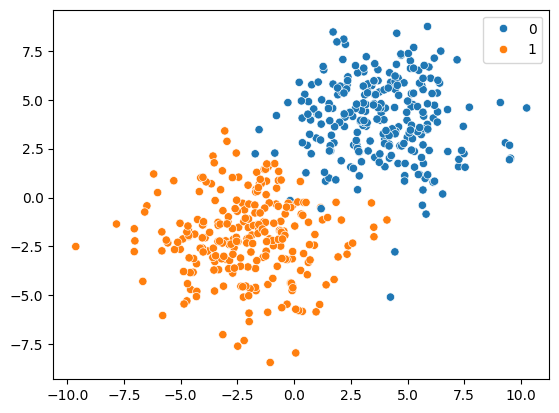

In [44]:
features,target = make_blobs(n_samples=500,n_features=2,cluster_std=[2,2],centers=[[4,4],[-2,-2]])
sns.scatterplot(x=features[:,0],y=features[:,1],hue=target)

In [ ]:
model = Cluster()
model.fit(features)

<Axes: >

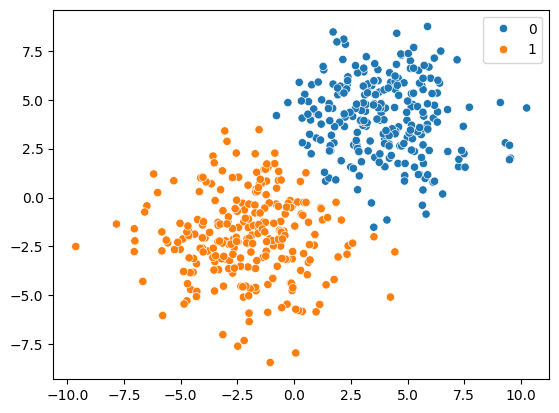

In [46]:
sns.scatterplot(x=features[:,0],y=features[:,1],hue=model.predict(features))

In [47]:
model.centers

[[3.9345847469567374, 4.094882425103105],
 [-2.053420001275827, -2.018144418594343]]